<a href="https://colab.research.google.com/github/ashedrack/3-Tier-Eks-IAC/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [2]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037323,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112915,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688812,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961182,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444031,6048178


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


Visualizing Closing Price

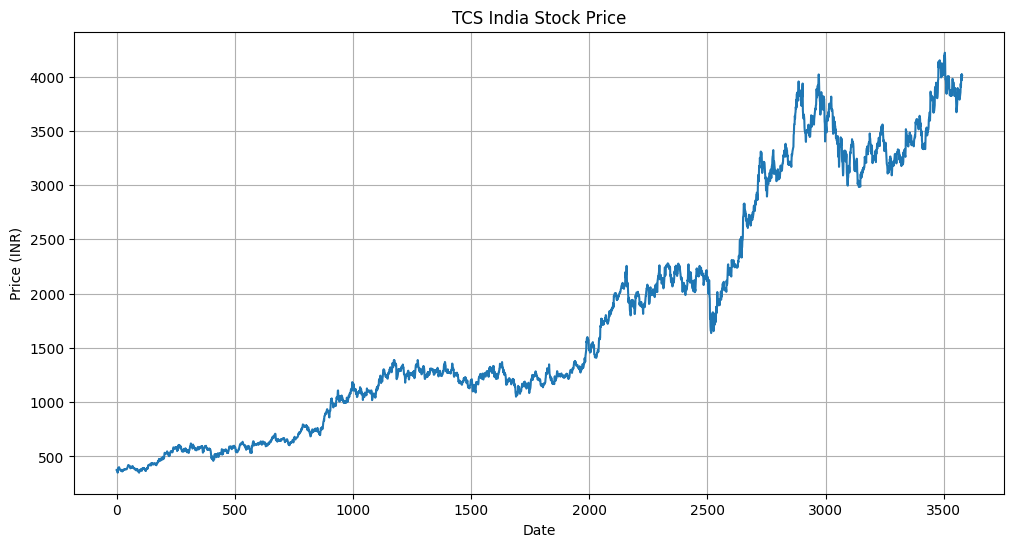

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3574,3884.000000,4001.699951,3884.000000,3978.199951,2658723
3575,3993.600098,4023.399902,3982.550049,4017.399902,2307449
3576,4020.000000,4026.100098,3955.000000,3965.250000,1821198
3577,3999.850098,4047.350098,3982.100098,4020.949951,2518001


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3574    3942.483501
3575    3944.116001
3576    3944.105500
3577    3944.582000
3578    3943.340000
Name: Close, Length: 3579, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

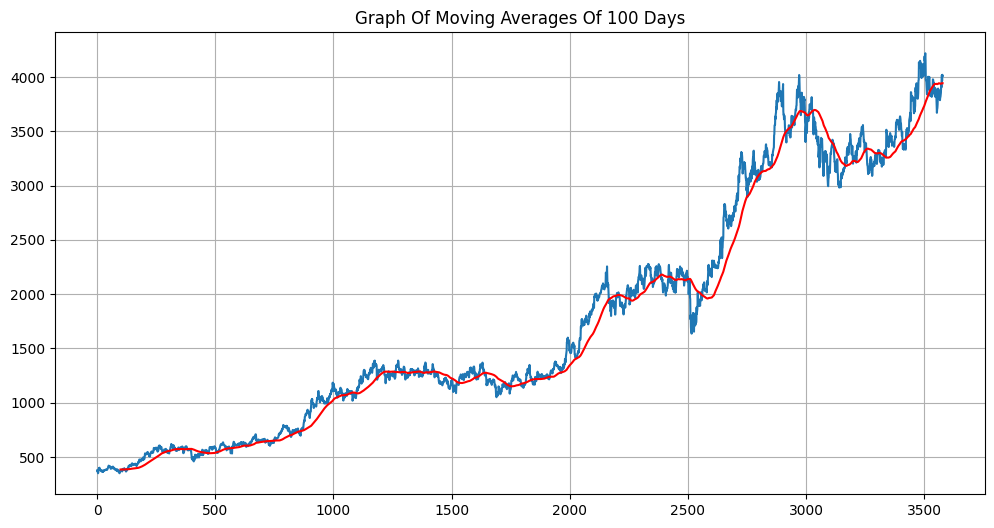

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3574    3769.463752
3575    3772.458252
3576    3775.137751
3577    3778.093002
3578    3780.875752
Name: Close, Length: 3579, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

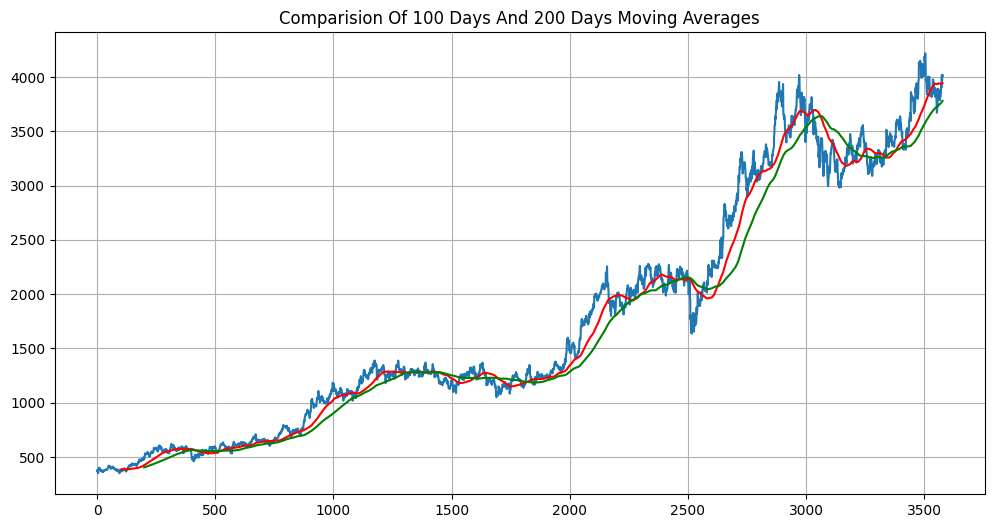

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(3579, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2505, 7)
(1074, 7)


In [14]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,284.037323,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,284.112915,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,277.688812,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,269.961182,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,264.444031,6048178


In [15]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2505,2020-03-03,2020.000000,2060.000000,2012.000000,2036.199951,1868.801758,2757585
2506,2020-03-04,2056.000000,2094.449951,2025.000000,2083.199951,1911.937744,3237002
2507,2020-03-05,2085.699951,2147.750000,2084.050049,2125.050049,1950.347046,3937056
2508,2020-03-06,2098.000000,2123.649902,2071.600098,2116.449951,1942.454590,2595027
2509,2020-03-09,2075.000000,2079.899902,1935.000000,1972.349976,1810.200928,4940975


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.91056312],
       [0.85592598],
       [0.85652241]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2405, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 [==============================] - 52s 555ms/step - loss: 0.0378 - mean_absolute_error: 0.1268
Epoch 2/100
76/76 [==============================] - 41s 545ms/step - loss: 0.0092 - mean_absolute_error: 0.0671
Epoch 3/100
76/76 [==============================] - 42s 547ms/step - loss: 0.0076 - mean_absolute_error: 0.0602
Epoch 4/100
76/76 [==============================] - 41s 547ms/step - loss: 0.0060 - mean_absolute_error: 0.0544
Epoch 5/100
76/76 [==============================] - 41s 541ms/step - loss: 0.0062 - mean_absolute_error: 0.0560
Epoch 6/100
76/76 [==============================] - 41s 544ms/step - loss: 0.0058 - mean_absolute_error: 0.0536
Epoch 7/100
76/76 [==============================] - 42s 550ms/step - loss: 0.0056 - mean_absolute_error: 0.0521
Epoch 8/100
76/76 [==============================] - 41s 535ms/step - loss: 0.0056 - mean_absolute_error: 0.0517
Epoch 9/100
76/76 [==============================] - 41s 538ms/step - loss: 0.0051 - mean_absolu

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(988, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = past_100_days.append(test_df, ignore_index = True)

<ipython-input-28-50640d85f7a0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [ ]:
final_df.head()

,0
0,2000.000000
1,2016.800049
2,1982.599976
3,1989.750000
4,1994.300049


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.15261459],
       [0.15966514],
       [0.14531224],
       ...,
       [0.66491104],
       [0.66910778],
       [0.67745936]])

In [ ]:
input_data.shape

(1088, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(988, 100, 1)
(988,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

31/31 [==============================] - 2s 56ms/step


In [ ]:
y_pred.shape

(988, 1)

In [ ]:
y_test

array([0.20664766, 0.19137155, 0.19265148, 0.19825417, 0.19267248,
       0.21302669, 0.19867385, 0.18692296, 0.175298  , 0.17275895,
       0.17575959, 0.18356557, 0.19775058, 0.21401296, 0.2351016 ,
       0.2543017 , 0.229457  , 0.22232254, 0.2288904 , 0.2497692 ,
       0.25870828, 0.26210758, 0.25925388, 0.25942171, 0.25719741,
       0.25788994, 0.26168791, 0.26926305, 0.25747026, 0.26823487,
       0.2650034 , 0.25929578, 0.25860336, 0.24796458, 0.2531476 ,
       0.25841453, 0.25235015, 0.25444853, 0.22106351, 0.22622543,
       0.2085782 , 0.19802333, 0.19565221, 0.19777159, 0.21376112,
       0.19710007, 0.2018214 , 0.18029209, 0.18490851, 0.19873676,
       0.19980695, 0.19323908, 0.20629089, 0.19838009, 0.20717225,
       0.2277992 , 0.23894158, 0.22817697, 0.23877375, 0.25694567,
       0.24280256, 0.24219405, 0.26093258, 0.25595939, 0.23631861,
       0.23839598, 0.22190286, 0.2210215 , 0.23098877, 0.23075793,
       0.24326424, 0.2565679 , 0.26857063, 0.25186757, 0.25302

In [ ]:
y_pred

array([[0.25775522],
       [0.2574226 ],
       [0.25603193],
       [0.25378746],
       [0.25095484],
       [0.24779236],
       [0.24466789],
       [0.24181482],
       [0.23931277],
       [0.23710254],
       [0.2350855 ],
       [0.23319581],
       [0.23144434],
       [0.22995044],
       [0.22890475],
       [0.22854826],
       [0.22912493],
       [0.23062554],
       [0.23290583],
       [0.23570824],
       [0.23884568],
       [0.24215785],
       [0.24578443],
       [0.2500002 ],
       [0.2548138 ],
       [0.2601531 ],
       [0.2659192 ],
       [0.2719805 ],
       [0.27820012],
       [0.2844245 ],
       [0.29052013],
       [0.2963118 ],
       [0.30160153],
       [0.30622107],
       [0.30994543],
       [0.3126263 ],
       [0.31429124],
       [0.3150097 ],
       [0.3149148 ],
       [0.31381044],
       [0.31146136],
       [0.30747977],
       [0.30172443],
       [0.29434383],
       [0.28587353],
       [0.27711836],
       [0.2686513 ],
       [0.260

In [ ]:
scaler.scale_

array([0.00041967])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

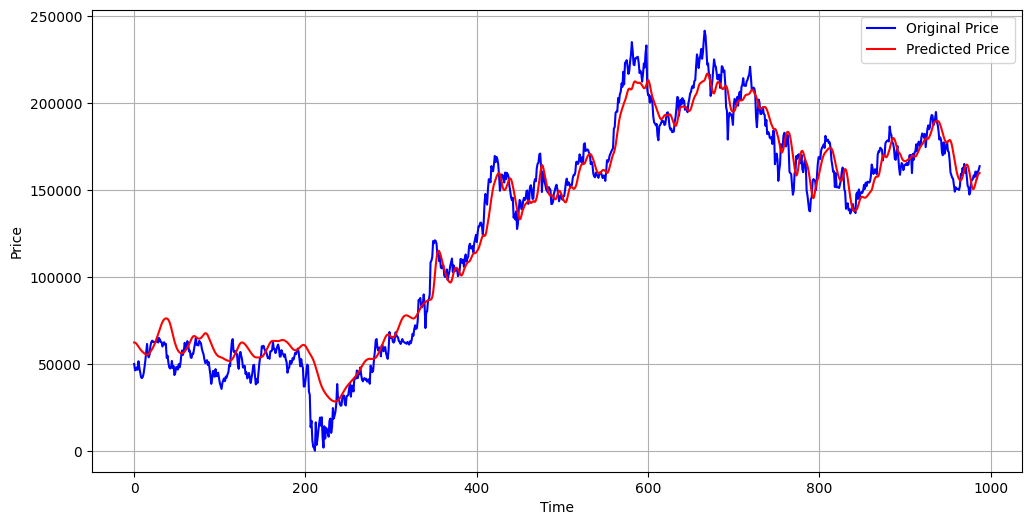

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 6.54%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9702856476907452


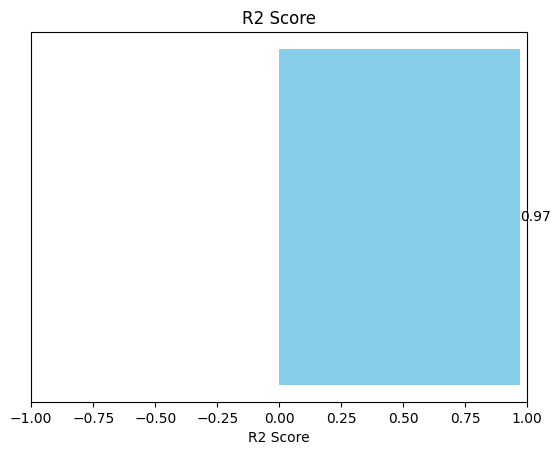

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

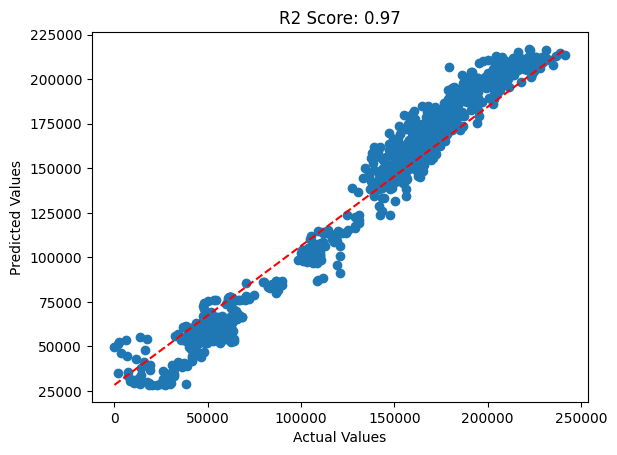

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()